In [1]:
# Recurrent Neural Network
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the training set

apple_training_complete = pd.read_csv('Dataset/AAPL (3).csv')
apple_training_complete.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.117142,79.285713,77.375717,78.432854,69.057251,140129500
1,2013-01-03,78.268570,78.524284,77.285713,77.442856,68.185600,88241300
2,2013-01-04,76.709999,76.947144,75.118568,75.285713,66.286301,148583400
3,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.896370,121039100
4,2013-01-08,75.601425,75.984283,74.464287,75.044289,66.073723,114676800


In [3]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [4]:
apple_training_processed.shape

(1259, 1)

In [5]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [17]:
# Creating a data structure with 60 timesteps and 1 output

features_set = []
labels = []
for i in range(60, 1259):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

AttributeError: 'list' object has no attribute 'shape'

In [19]:
#  convert both the feature_set and the labels list to the numpy array
features_set, labels = np.array(features_set), np.array(labels)
features_set.shape,labels.shape

((1199, 60), (1199,))

In [8]:
# Reshaping
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape,labels.shape

((1199, 60, 1), (1199,))

In [112]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [113]:
# Initialising the RNN
model = Sequential()

In [114]:
# Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [115]:
# add a dropout layer to our model. Dropout layer is added to avoid over-fitting, 
model.add(Dropout(0.2))

In [116]:
# Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [117]:
# Adding the output layer
model.add(Dense(units = 1))

In [118]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [119]:
# Fitting the RNN to the Training set
model.fit(features_set, labels, epochs = 100, batch_size = 32)


Epoch 1/100
1199/1199 [==============================] - 34s 29ms/step - loss: 0.0439
Epoch 2/100
1199/1199 [==============================] - 8s 6ms/step - loss: 0.0057
Epoch 3/100
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 4/100
1199/1199 [==============================] - 4s 4ms/step - loss: 0.0045
Epoch 5/100
1199/1199 [==============================] - 4s 4ms/step - loss: 0.0043
Epoch 6/100
1199/1199 [==============================] - 4s 4ms/step - loss: 0.0042
Epoch 7/100
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 8/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 9/100
1199/1199 [==============================] - 5s 5ms/step - loss: 0.0038
Epoch 10/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 11/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 12/100
1199/1199 [==============================] - 5s 4ms/step - 

In [120]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017

apple_testing_complete = pd.read_csv('dataset/AAPL (4).csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values
# apple_testing_processed
apple_testing_complete.shape

(21, 7)

In [121]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)
apple_total.shape

(1280,)

In [122]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values
test_inputs.shape

(81,)

In [123]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_inputs.shape

(81, 1)

In [124]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

In [125]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [126]:
predictions = model.predict(test_features)

In [127]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[168.32278],
       [167.96837],
       [168.2282 ],
       [168.89929],
       [169.76488],
       [170.67207],
       [171.43378],
       [171.70892],
       [171.7651 ],
       [172.00903],
       [172.69319],
       [173.3041 ],
       [174.09607],
       [174.82826],
       [175.1199 ],
       [175.00099],
       [174.67982],
       [173.94566],
       [172.65758],
       [170.96338]], dtype=float32)

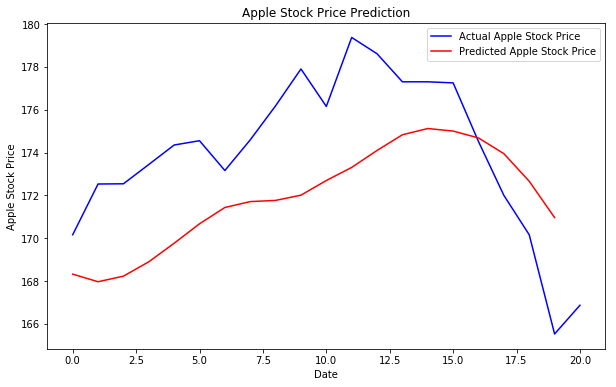

In [128]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()